In [4]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import matplotlib

# 1 Apprentissage des paramètres d’un modèle à partir de données

## Question 1.1.1

Grace a la séquence d'observation et la formule suivante: $p(x|y)=P(X_i|X_{i-1})$ on peut déduire la Matrice de transition suivante:

$$\begin{matrix}
& S & I & R \\
S & \frac{2}{3} & \frac{1}{3} & 0 \\
I & 0 & \frac{5}{6} & \frac{1}{6} \\
R & 0 & 0 & 1
\end{matrix}$$




## Question 1.2.1

In [6]:
#lire les données
data = np.loadtxt('data_exo_2022.txt',dtype=int)

## Question 1.2.2

In [7]:
matrice_transitions = np.zeros((3,3))

#Compte le nombre de transitions entre chaque états
for individu in data :
    for i in range(0, len(individu) - 1) :
        matrice_transitions[individu[i]][individu[i + 1]] += 1

#Calcule la probabilité de transition entre les états
for l in range(0, len(matrice_transitions)) :
    somme_ligne = sum(matrice_transitions[l])
    for c in range(0, len(matrice_transitions[l])) :
        matrice_transitions[l][c] = matrice_transitions[l][c] / somme_ligne

print(matrice_transitions)

[[0.93082918 0.06917082 0.        ]
 [0.         0.93518148 0.06481852]
 [0.04065945 0.         0.95934055]]


# 2 Description du premier modèle

## Question 2.1.1

A partir du graphe de transition, la matrice de transition A est la suivante:
$$\begin{matrix}
 & S & I & R \\
S & 0.92 & 0.08 & 0 \\
I & 0 & 0.93 & 0.07 \\
R & 0 & 0 & 1 
\end{matrix}$$

In [8]:
def verifie_matrice_stochastique(matrix):
  # si matrice n'est pas carre
  if matrix.shape[0] != matrix.shape[1]:
    return False
  if not np.all(matrix >= 0):
    return False
#check si somme = 1
  for i in range(matrix.shape[0]):
    if (np.sum(matrix[i, :]) -1)>1e-10:
        return False       
  
  return True

print(verifie_matrice_stochastique(matrice_transitions))

True


## Question 2.1.2

D'apres l'énoncé,au temps t = 0, un individu a une probabilité de 0.9 d’être sain et 0.1 d’être infecté.

On a donc le vecteur de distribution initiale suivant: $\pi_0 = (0.9, 0.1, 0)$

## Distribution $π_t$

## Question 1

On suppose que la chaîne de Markov est homogène. On a donc:\
$\pi_t$ = $\pi_{t-1} * A$\
\
$\pi_1 = \pi_0 * A = (0.828, 0.165, 0.007)$

## Question 2

$\pi_2 = \pi_1 * A = (0.76176, 0.21969, 0.01855)$


## Question 3

$\pi_{t+1} = \pi_t * A$

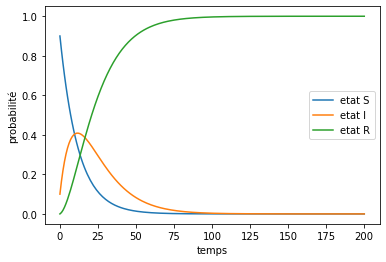

In [10]:
pi_0 = np.array([0.9, 0.1, 0])
A = np.array([[0.92, 0.08, 0],[0, 0.93, 0.07],[0, 0, 1]])
pi_liste = [pi_0]

for i in range(0, 200):
    pi_0 = np.dot(pi_0, A)
    pi_liste.append(pi_0)
    
pi_0 = np.array([0.9, 0.1, 0])
plt.plot(pi_liste)
plt.legend(('etat S','etat I','etat R'))
plt.xlabel('temps')
plt.ylabel('probabilité')
plt.show()

D'après le graphique, on voit que le nombre de personnes infectées atteint un maximum à environ 10 jours. A 100 jours, la probabilité d'être guéri tend vers 1 (donc tout le monde est guéri), et la probabilité d'être infecté ou sain tend vers 0 (donc personne n'est infecté).

## Tirage aléatoire des états

In [15]:
def genere_seq_alea(matrice,pi_0,T):
    t0 = rd.random()
    if t0 < pi_0[0] :
        t0 = 0
    else:
        t0 = 1
    sequence=[t0]
    
    for i in range(1,T):
        etat_precedent=sequence[i-1]
        proba=matrice[etat_precedent]
        etat_present=rd.random()
        
        if etat_present < proba[0]:
            sequence.append(0)
        elif etat_present < proba[0] + proba[1]:
            sequence.append(1)
        else:
            sequence.append(2)
            
    return sequence

In [17]:
etats={0:"S",1:"I",2:"R"}
sequence = genere_seq_alea(A,pi_0,150)
print(sequence)
#for state in sequence:
 #   print(etats[state])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [18]:
def compter_population(matrice,pi_0,T,nbrIndividu,afficher=True,graphe=True,retourner=True):
    """
    affiche le nombre et le pourcentage d'individu de
    chaque etat de chaque jour
    """
    liste_seq=[]
    for i in range(nbrIndividu):
        liste_seq.append(genere_seq_alea(matrice,pi_0,T))
    liste_nb_etat=[]
    for i in range(T):
        temps_i=[0,0,0]
        for j in range(nbrIndividu):
            etat_personnej=liste_seq[j][i]
            temps_i[etat_personnej]+=1
        if afficher:
            print("À " + str(i) + " jours: \n")
            print("Nombre d'individu sains: " + str(temps_i[0]) + ", Pourcentage de population sains: " + str(temps_i[0]/nbrIndividu*100) + "%")
            print("Nombre d'individu infectés: " + str(temps_i[1])+ ", Pourcentage de population infectés: " + str(temps_i[1]/nbrIndividu*100)+"%")
            print("Nombre d'individu guéris: " + str(temps_i[2]) + ", Pourcentage de population guéris: " + str(temps_i[2]/nbrIndividu*100)+"%")
            print("")
        liste_nb_etat.append(temps_i)
    if graphe:
        plt.plot(liste_nb_etat)
        plt.legend(('etat S','etat I','etat R'))
        plt.xlabel('temps')
        plt.ylabel("nombre d\'individu")
        plt.title("Distribution d\'une population de "+ str(nbrIndividu) + " individus dans " + str(T) + " jours")
        plt.show()
    if retourner:
        return liste_seq

À 0 jours: 

Nombre d'individu sains: 181, Pourcentage de population sains: 90.5%
Nombre d'individu infectés: 19, Pourcentage de population infectés: 9.5%
Nombre d'individu guéris: 0, Pourcentage de population guéris: 0.0%

À 1 jours: 

Nombre d'individu sains: 169, Pourcentage de population sains: 84.5%
Nombre d'individu infectés: 31, Pourcentage de population infectés: 15.5%
Nombre d'individu guéris: 0, Pourcentage de population guéris: 0.0%

À 2 jours: 

Nombre d'individu sains: 155, Pourcentage de population sains: 77.5%
Nombre d'individu infectés: 44, Pourcentage de population infectés: 22.0%
Nombre d'individu guéris: 1, Pourcentage de population guéris: 0.5%

À 3 jours: 

Nombre d'individu sains: 144, Pourcentage de population sains: 72.0%
Nombre d'individu infectés: 53, Pourcentage de population infectés: 26.5%
Nombre d'individu guéris: 3, Pourcentage de population guéris: 1.5%

À 4 jours: 

Nombre d'individu sains: 131, Pourcentage de population sains: 65.5%
Nombre d'individu i

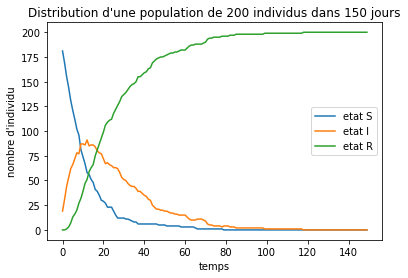

In [19]:
compter_population(A,pi_0,150,200,True,True,False)

À 0 jours: 

Nombre d'individu sains: 5, Pourcentage de population sains: 100.0%
Nombre d'individu infectés: 0, Pourcentage de population infectés: 0.0%
Nombre d'individu guéris: 0, Pourcentage de population guéris: 0.0%

À 1 jours: 

Nombre d'individu sains: 3, Pourcentage de population sains: 60.0%
Nombre d'individu infectés: 2, Pourcentage de population infectés: 40.0%
Nombre d'individu guéris: 0, Pourcentage de population guéris: 0.0%

À 2 jours: 

Nombre d'individu sains: 2, Pourcentage de population sains: 40.0%
Nombre d'individu infectés: 3, Pourcentage de population infectés: 60.0%
Nombre d'individu guéris: 0, Pourcentage de population guéris: 0.0%

À 3 jours: 

Nombre d'individu sains: 2, Pourcentage de population sains: 40.0%
Nombre d'individu infectés: 2, Pourcentage de population infectés: 40.0%
Nombre d'individu guéris: 1, Pourcentage de population guéris: 20.0%

À 4 jours: 

Nombre d'individu sains: 2, Pourcentage de population sains: 40.0%
Nombre d'individu infectés: 1, 

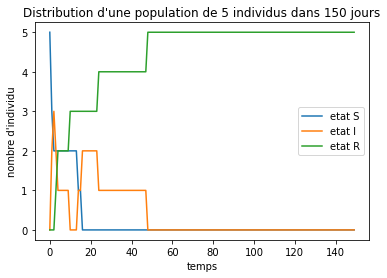

In [20]:
compter_population(A,pi_0,150,5,True,True,False)

À 0 jours: 

Nombre d'individu sains: 4511, Pourcentage de population sains: 90.22%
Nombre d'individu infectés: 489, Pourcentage de population infectés: 9.78%
Nombre d'individu guéris: 0, Pourcentage de population guéris: 0.0%

À 1 jours: 

Nombre d'individu sains: 4141, Pourcentage de population sains: 82.82000000000001%
Nombre d'individu infectés: 829, Pourcentage de population infectés: 16.580000000000002%
Nombre d'individu guéris: 30, Pourcentage de population guéris: 0.6%

À 2 jours: 

Nombre d'individu sains: 3807, Pourcentage de population sains: 76.14%
Nombre d'individu infectés: 1098, Pourcentage de population infectés: 21.959999999999997%
Nombre d'individu guéris: 95, Pourcentage de population guéris: 1.9%

À 3 jours: 

Nombre d'individu sains: 3497, Pourcentage de population sains: 69.94%
Nombre d'individu infectés: 1320, Pourcentage de population infectés: 26.400000000000002%
Nombre d'individu guéris: 183, Pourcentage de population guéris: 3.66%

À 4 jours: 

Nombre d'indiv

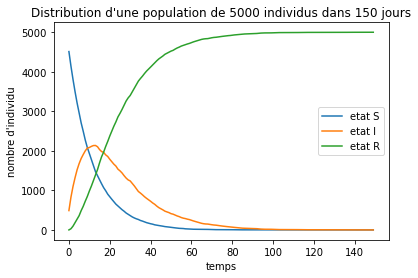

In [21]:
compter_population(A,pi_0,150,5000,True,True,False)

## Longueur de l’infection

## Question 1

In [22]:
def longueur_moyenne_infection(matrice,pi_0,T,nbrIndividu):
    """
    Retourne la longueur moyenne d'une sequence d'individu infectés
    """
    list_seq=compter_population(matrice,pi_0,T,nbrIndividu,False,False,True)
    s = 0
    moy=0
    for etat in list_seq:
        s += etat.count(1)
    moyenne=s/len(list_seq)
    
    return moyenne

In [23]:
longueur_moyenne_infection(A,pi_0,150,5000)

14.1794

## Question 2

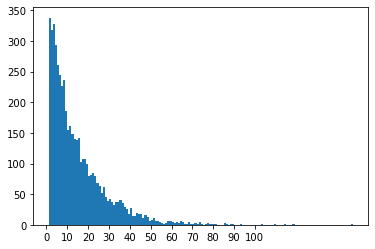

In [24]:
temps_infecte = []
liste_seq = compter_population(A,pi_0,150,5000,False,False,True)
for etat in liste_seq :
    temps_infecte.append(etat.count(1))
plt.hist(temps_infecte, bins=np.arange(min(temps_infecte), max(temps_infecte) + 1, 1))
plt.xticks(np.arange(0,101,step=10))
plt.show()    

## Question 3

# 3 Description du second modele


## Analyse du modele


### Question 1


Ce processus peut effectivement etre modelise par une chaine de markov car le processus est homogene, on a un nombre d'états fini et état t+1 depend que de t.


### Question 2



$$\begin{matrix}
& S & I & R \\
S & 0.92 & 0.08 & 0 \\
I & 0 & 0.93 & 0.07 \\
R & 0.02 & 0 & 0.98
\end{matrix}$$



### Question 3

Ce modèle n'est pas périodique, mais irréductible

### Question 4

la matrice AxA correspond a une matrice de transition au temps t+2

In [25]:
A = np.array([[0.92, 0.08, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])
A2= np.dot(A,A)
#print(A2)
print("Est elle stochastique?", verifie_matrice_stochastique(A2))

Est elle stochastique? True


la matrice $A^3$ correspond a une matrice de transition au temps t+3



In [24]:

A3= np.dot(A,A2)
#print(A3)
print("Est elle stochastique?", verifie_matrice_stochastique(A3))

Est elle stochastique? True


la matrice $A^4$ correspond a une matrice de transition au temps t+4

In [23]:
A4= np.dot(A,A3)
#print(A4)
print("Est elle stochastique?", verifie_matrice_stochastique(A4))

Est elle stochastique? True


### Question 5

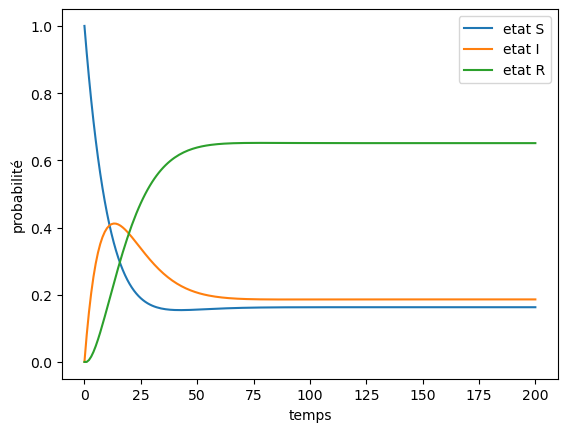

In [26]:
pi_0 = np.array([1, 0, 0])
A = np.array([[0.92, 0.08, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])
pi_liste = [pi_0]

for i in range(0, 200):
    pi_0 = np.dot(pi_0, A)
    pi_liste.append(pi_0)
    
plt.plot(pi_liste)
plt.legend(('etat S','etat I','etat R'))
plt.xlabel('temps')
plt.ylabel('probabilité')
plt.show()

#### REMARQUES:

### Question 6

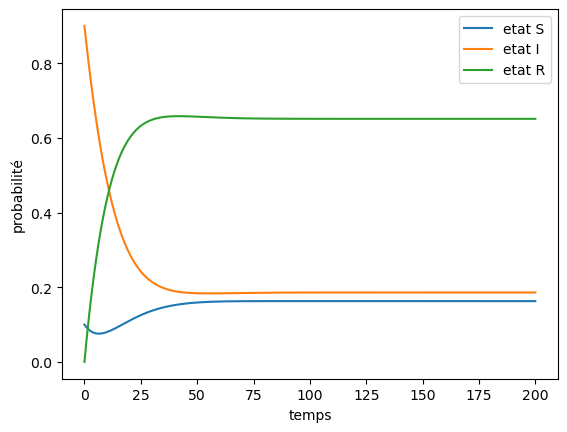

In [27]:
pi_0 = np.array([0.1, 0.9, 0])
A = np.array([[0.92, 0.08, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])
pi_liste = [pi_0]

for i in range(0, 200):
    pi_0 = np.dot(pi_0, A)
    pi_liste.append(pi_0)
    
plt.plot(pi_liste)
plt.legend(('etat S','etat I','etat R'))
plt.xlabel('temps')
plt.ylabel('probabilité')
plt.show()

#### REMARQUES

#### 1-60 % sains et 40 % gueris


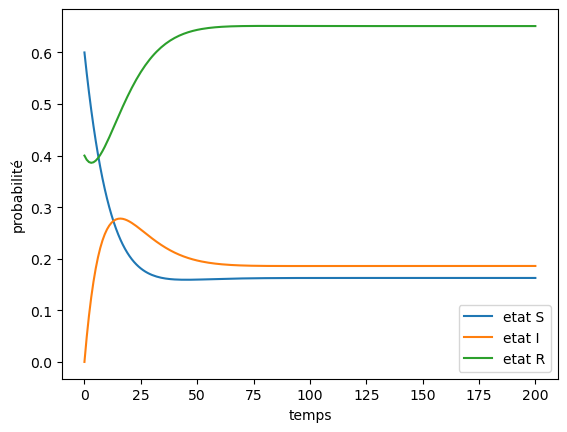

In [30]:
pi_0 = np.array([0.6, 0, 0.4])
A = np.array([[0.92, 0.08, 0],[0, 0.93, 0.07],[0.02, 0, 0.98]])
pi_liste = [pi_0]

for i in range(0, 200):
    pi_0 = np.dot(pi_0, A)
    pi_liste.append(pi_0)
    
plt.plot(pi_liste)
plt.legend(('etat S','etat I','etat R'))
plt.xlabel('temps')
plt.ylabel('probabilité')
plt.show()

#### REMARQUES

### Question 7